<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




# How to use Detectron2 Object Detection with Ikomia API

[Detectron2](https://github.com/facebookresearch/detectron2) is Python Library created by Facebook and providing many algorithms for object detection, object segmentation or pose estimation.

Detectron2 is open source, maintained by Facebook and you can built your own project on top of it.

In this tutorial, we present how it can be very easy to use Detectron2 Object Detection algorithms with a few lines of code.

## ENJOY 🥰 !!

<p float="left">
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_d2_original.jpg?raw=true" width="500" />
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_d2.png?raw=true" width="500" /> 
</p>

## Setup

You need to install Ikomia Python API on Google Colab with pip.

In [1]:
!pip install ikomia

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/home/yom/Developpement/python_venv/python3.7/bin/python -m pip install --upgrade pip' command.




---


**-Google Colab ONLY- Restart runtime**

Some Python packages have been updated. Please click on the "RESTART RUNTIME" button at the end the previous window.





---

Use your credentials to connect with Ikomia Hub and access more than 60 algorithms and 800+ models.

Your credentials are the same as you use to login to our website, if you don't have any credentials, follow this link

https://members.ikomia.com/accounts/signup/

In [1]:
import ikomia
import os

# Easy and unsafe authentication | Only for personal use
os.environ['IKOMIA_USER'] = "your_login"
os.environ['IKOMIA_PWD'] = "your_password"

ikomia.authenticate()

Logging started at 2022-10-25 12:42:55
Ikomia auto-completion updated for Ikomia HUB algorithms.


## Apply Detectron2 Object Detection algorithms on your images

First, you create a new workflow from scratch.

Then you add the Detectron2 algorithm and it will automagically download the algorithm from Ikomia Hub and install all the Python dependencies (the 1st time, it can take a while, be patient ! ).

In [2]:
from ikomia.utils import ik
from ikomia.dataprocess import workflow, displayIO

# Create workflow from scratch
wf = workflow.create("Detectron2 Object Detection Demo")

# Add algorithms to your workflow
d2_id, d2 = wf.add_task(ik.infer_detectron2_detection)

# Connect your tasks
wf.connect_tasks(wf.getRootID(), d2_id)

Once Detectron2 is installed, you can check the available pre-trained models by code.

In [3]:
import detectron2
import os

config_paths = os.path.dirname(detectron2.__file__) + "/model_zoo"

available_cfg = []
for root, dirs, files in os.walk(config_paths, topdown=False):
    for name in files:
        file_path = os.path.join(root, name)
        possible_cfg = os.path.join(*file_path.split('/')[-2:])
        if "Detection" in possible_cfg and possible_cfg.endswith('.yaml') and 'rpn' not in possible_cfg:
            available_cfg.append(possible_cfg.replace('.yaml', ''))
for model_name in available_cfg:
    print(model_name)

PascalVOC-Detection/faster_rcnn_R_50_FPN
PascalVOC-Detection/faster_rcnn_R_50_C4
COCO-Detection/faster_rcnn_R_50_FPN_1x
COCO-Detection/faster_rcnn_R_50_DC5_1x
COCO-Detection/retinanet_R_50_FPN_1x
COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x
COCO-Detection/faster_rcnn_R_101_FPN_3x
COCO-Detection/fast_rcnn_R_50_FPN_1x
COCO-Detection/faster_rcnn_R_50_FPN_3x
COCO-Detection/retinanet_R_50_FPN_3x
COCO-Detection/faster_rcnn_R_50_DC5_3x
COCO-Detection/faster_rcnn_R_101_DC5_3x
COCO-Detection/faster_rcnn_R_50_C4_3x
COCO-Detection/faster_rcnn_R_50_C4_1x
COCO-Detection/retinanet_R_101_FPN_3x
COCO-Detection/faster_rcnn_R_101_C4_3x


Download your image by changing the url.

In [4]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O image.jpg

--2022-10-25 12:43:26--  http://images.cocodataset.org/val2017/000000439715.jpg
Résolution de images.cocodataset.org (images.cocodataset.org)… 52.216.66.56
Connexion à images.cocodataset.org (images.cocodataset.org)|52.216.66.56|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 209222 (204K) [image/jpeg]
Sauvegarde en : « image.jpg »

image.jpg           100%[===================>] 204,32K   344KB/s    ds 0,6s    

2022-10-25 12:43:27 (344 KB/s) — « image.jpg » sauvegardé [209222/209222]



Now select your preferred model and run on your image.

In [9]:
from ikomia.core import task
import cv2

# Set your preferred model
d2_params = {
    ik.infer_detectron2_detection_param.model_name: "COCO-Detection/faster_rcnn_R_50_C4_3x" # <-- change your model here
}
wf.set_parameters(task_id=d2_id, params=d2_params)

# Run
wf.run_on(path=os.getcwd()+"/image.jpg")

[Checkpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_C4_3x/137849393/model_final_f97cb7.pkl ...
URL https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_C4_3x/137849393/model_final_f97cb7.pkl cached in /home/yom/.torch/iopath_cache/detectron2/COCO-Detection/faster_rcnn_R_50_C4_3x/137849393/model_final_f97cb7.pkl
Reading a file from 'Detectron2 Model Zoo'
Inference will run on cuda


/home/yom/Developpement/python_venv/python3.7/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Display your results

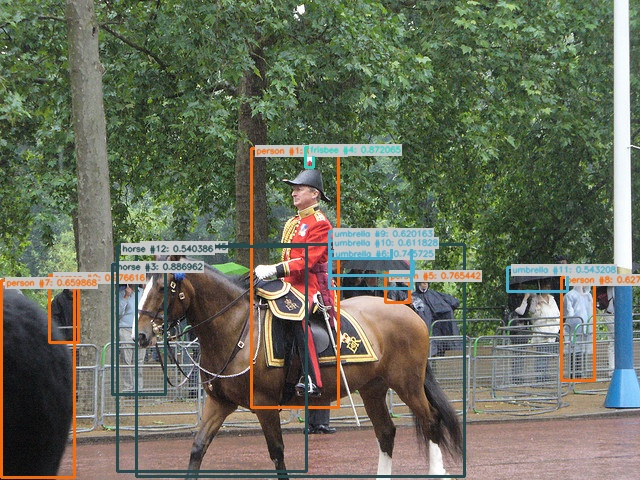

In [10]:
# Utility function for displaying image
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
# Display
img_d2 = wf.get_image_with_graphics(d2_id)

img_d2 = cv2.cvtColor(img_d2, cv2.COLOR_RGB2BGR)
imshow(img_d2)

## -Google Colab ONLY- Save your custom image in your Google Drive space

In [ ]:
# Uncomment these lines if you're working on Colab
# from google.colab import drive
# drive.mount('/content/gdrive')

# cv2.imwrite("/content/gdrive/MyDrive/img_d2.png", img_d2)

## -Google Colab ONLY- Download directly your custom image

In [ ]:
# Uncomment these lines if you're working on Colab
# from google.colab import files
# cv2.imwrite("/content/img_d2.png", img_d2)
# files.download('/content/img_d2.png')